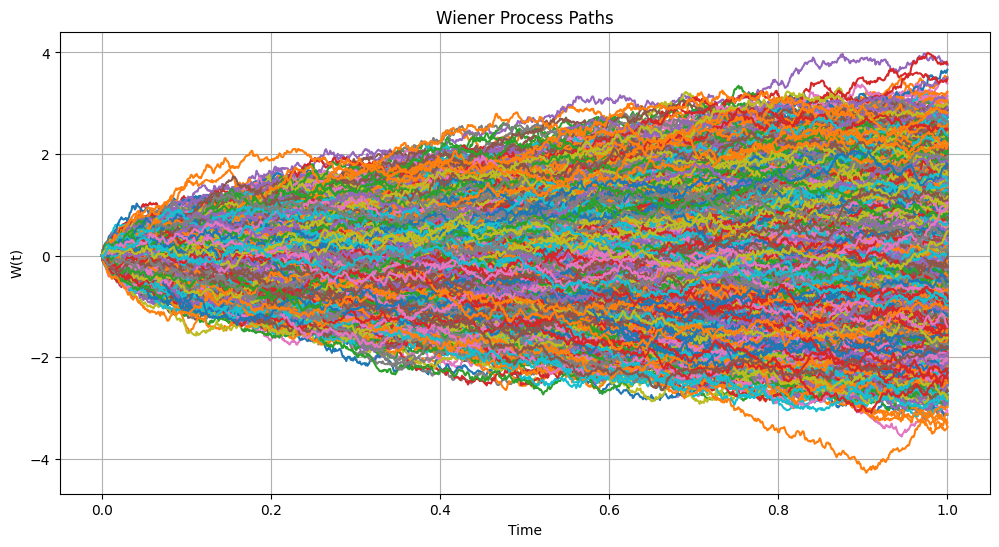

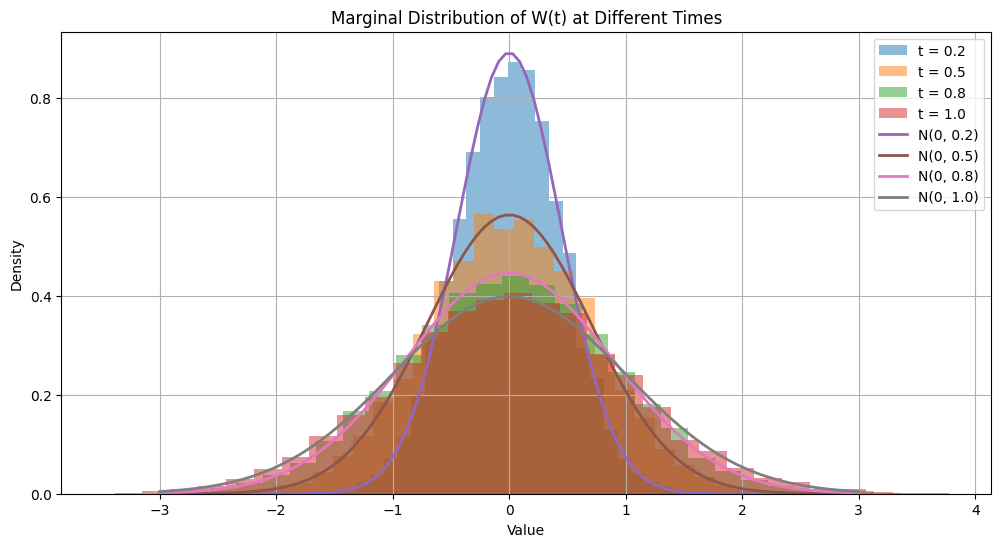

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
time_steps = 1000  # Number of time steps
T = 1.0  # Total time
dt = T / time_steps  # Time step size
num_paths = 10000  # Number of paths to simulate

# Generate Wiener process paths
t = np.linspace(0, T, time_steps + 1)
W = np.zeros((num_paths, time_steps + 1))

for i in range(num_paths):
    dW = np.sqrt(dt) * np.random.randn(time_steps)
    W[i, 1:] = np.cumsum(dW)

# Plot Wiener process paths
plt.figure(figsize=(12, 6))
for i in range(num_paths):
    plt.plot(t, W[i], lw=1.5)
plt.title('Wiener Process Paths')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

# Plot the marginal distribution of W(t) at different times
time_points = [0.2, 0.5, 0.8, 1.0]
plt.figure(figsize=(12, 6))

for tp in time_points:
    tp_index = int(tp / dt)
    plt.hist(W[:, tp_index], bins=30, density=True, alpha=0.5, label=f't = {tp}')

# Theoretical normal distributions for comparison
from scipy.stats import norm

x = np.linspace(-3, 3, 100)
for tp in time_points:
    plt.plot(x, norm.pdf(x, scale=np.sqrt(tp)), lw=2, label=f'N(0, {tp})')

plt.title('Marginal Distribution of W(t) at Different Times')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Chinese restaurant process:

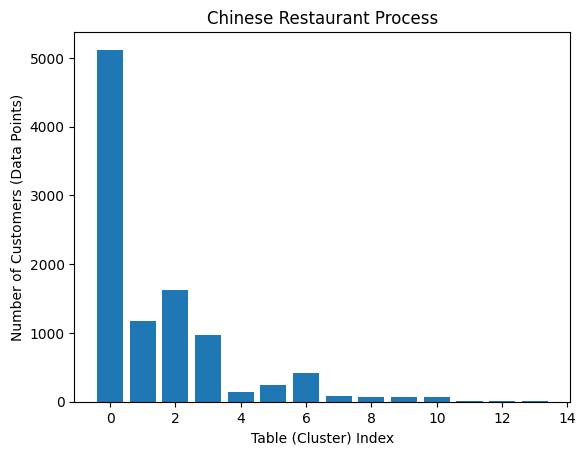

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def chinese_restaurant_process(num_customers, alpha):
    tables = []
    for customer in range(num_customers):
        if customer == 0:
            tables.append(1)
        else:
            table_probabilities = [n / (customer + alpha) for n in tables] + [alpha / (customer + alpha)]
            chosen_table = np.random.choice(len(table_probabilities), p=table_probabilities)
            if chosen_table == len(tables):
                tables.append(1)
            else:
                tables[chosen_table] += 1
    return tables

num_customers = 10000
alpha = 1.0
tables = chinese_restaurant_process(num_customers, alpha)

plt.bar(range(len(tables)), tables)
plt.xlabel('Table (Cluster) Index')
plt.ylabel('Number of Customers (Data Points)')
plt.title('Chinese Restaurant Process')
plt.show()